In [1]:
#import library
import pandas as pd
pd.options.display.max_columns = 50

import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
#import dataset
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

In [111]:
#Tampilkan jumlah baris dan kolom
df_load.shape

(7113, 22)

In [112]:
#Tampilkan 5 data teratas
df_load.head(5)

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [113]:
df_load.columns

Index(['UpdatedAt', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

In [114]:
#Jumlah ID yang unik
df_load.customerID.nunique()

7017

dari sini bisa kita ketaui bahwa ada 7017/7113 pengguna unik

In [115]:
print(df_load.customerID.count())
df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})') #filtering data nomor telepon dari customerID match condition as boolean data
print(df_load['valid_id'])
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis=1) #drop valid_id data
print('Hasil jumlah ID Customer yang terfilter adalah', df_load['customerID'].count())

7113
0       True
1       True
2       True
3       True
4       True
        ... 
7108    True
7109    True
7110    True
7111    True
7112    True
Name: valid_id, Length: 7113, dtype: bool
Hasil jumlah ID Customer yang terfilter adalah 7006


In [116]:
# Drop Duplicate Rows
df_load.drop_duplicates()
print(df_load.shape)
# Drop duplicate ID sorted by Periode
df_load = df_load.sort_values('UpdatedAt', ascending = False).drop_duplicates(['customerID'])
print('Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah',df_load['customerID'].count())

(7006, 22)
Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah 6993


Berdasarkan hasil tersebut, terdapat perbedaan jumlah nomor ID dari data pertama kali di load sampai dengan hasil akhir. Jumlah row data ketika pertama kali di load ada sebanyak 7113 rows dan 22 columns dengan 7017 jumlah ID yang unique. Kemudian setelah di cek validitas dari ID pelanggan, maka tersisa 6993 rows data

In [117]:
df_load.isnull().sum()

UpdatedAt            0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure              99
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges      26
TotalCharges        15
Churn               43
dtype: int64

model tidak memprediksi data tanpa label churn

In [118]:
df_load.dropna(subset=['Churn'], inplace=True)
print('Total rows dan kolom Data setelah dihapus data Missing Values adalah', df_load.shape)

Total rows dan kolom Data setelah dihapus data Missing Values adalah (6950, 22)


In [119]:
#handling missing values Tenure fill with 11 by request
df_load['tenure'].fillna(11, inplace=True)

#Loop
#Handling missing values num vars (except Tenure)
for col_name in list(['MonthlyCharges','TotalCharges']):
    median = df_load[col_name].median()
    df_load[col_name].fillna(median, inplace=True)
print('Jumlah Missing Values setelah di imputer datanya, adalah:')
print(df_load.isnull().sum().sort_values(ascending=False))

Jumlah Missing Values setelah di imputer datanya, adalah:
UpdatedAt           0
customerID          0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
DeviceProtection    0
OnlineBackup        0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Dependents          0
Partner             0
SeniorCitizen       0
gender              0
Churn               0
dtype: int64


terbukti sudah tidak ada missing values lagi pada data, terbukti dari jumlah missing values masing-masing variable yang bernilai 0

In [120]:
print('\nPersebaran data sebelum ditangani Outlier: ')
df_load[['tenure','MonthlyCharges','TotalCharges']].describe()


Persebaran data sebelum ditangani Outlier: 


,tenure,MonthlyCharges,TotalCharges
count,6950.000000,6950.000000,6950.000000
mean,32.477266,65.783741,2305.083460
std,25.188910,50.457871,2578.651143
min,0.000000,0.000000,19.000000
25%,9.000000,36.462500,406.975000
50%,29.000000,70.450000,1400.850000
75%,55.000000,89.850000,3799.837500
max,500.000000,2311.000000,80000.000000


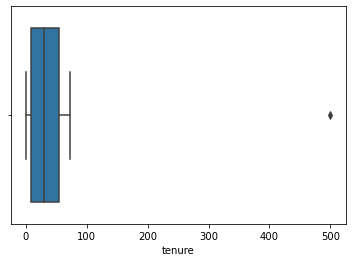

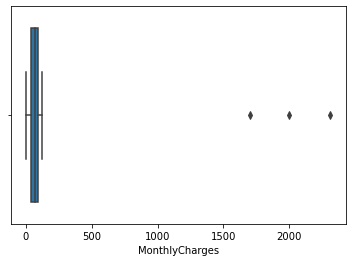

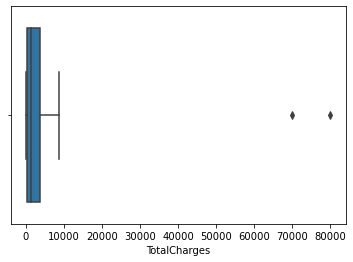

In [121]:
for col_name in list(['tenure','MonthlyCharges','TotalCharges']):
    plt.figure()
    sns.boxplot(x=df_load[col_name])
    plt.show()

In [122]:
Q1 = df_load[['tenure','MonthlyCharges','TotalCharges']].quantile(0.25)
Q3 = df_load[['tenure','MonthlyCharges','TotalCharges']].quantile(0.75)
IQR = Q3-Q1
max = Q3+(IQR*1.5)
min = Q1-(IQR*1.5)
print('\nNilai Maximum dari masing-masing Variable adalah: ')
print(max)
print('\nNilai Minimum dari masing-masing Variable adalah: ')
print(min)
df_load = df_load.mask(df_load>max, max, axis=1)
df_load = df_load.mask(df_load<min, min, axis=1)
print('\nPersebaran data setelah ditangani Outlier:')
print(df_load[['tenure','MonthlyCharges','TotalCharges']].describe())


Nilai Maximum dari masing-masing Variable adalah: 
tenure             124.00000
MonthlyCharges     169.93125
TotalCharges      8889.13125
dtype: float64

Nilai Minimum dari masing-masing Variable adalah: 
tenure             -60.00000
MonthlyCharges     -43.61875
TotalCharges     -4682.31875
dtype: float64


<ipython-input-122-31a1f5d4b5a6>:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_load = df_load.mask(df_load>max, max, axis=1)
<ipython-input-122-31a1f5d4b5a6>:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_load = df_load.mask(df_load<min, min, axis=1)



Persebaran data setelah ditangani Outlier:
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.423165       64.992201   2286.058750
std      24.581073       30.032040   2265.702553
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     124.000000      169.931250   8889.131250


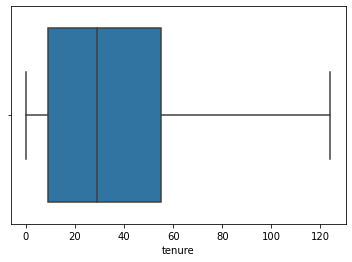

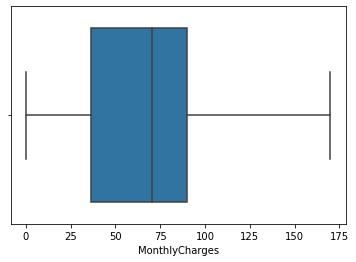

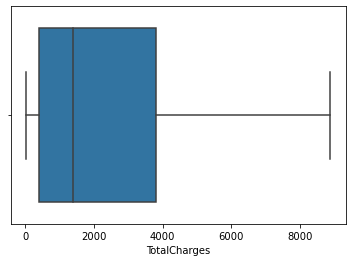

In [123]:
for col_name in list(['tenure','MonthlyCharges','TotalCharges']):
    plt.figure()
    sns.boxplot(x=df_load[col_name])
    plt.show()

In [124]:
for col_name in list(['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling', 'PaymentMethod','Churn']):
    print('\nUnique Values Count \033[1m' + 'Before Standardized \033[0m Variable', col_name)
    print(df_load[col_name].value_counts())


Unique Values Count Before Standardized  Variable gender
Male         3499
Female       3431
Wanita         14
Laki-Laki       6
Name: gender, dtype: int64

Unique Values Count Before Standardized  Variable SeniorCitizen
0    5822
1    1128
Name: SeniorCitizen, dtype: int64

Unique Values Count Before Standardized  Variable Partner
No     3591
Yes    3359
Name: Partner, dtype: int64

Unique Values Count Before Standardized  Variable Dependents
No     4870
Yes    2060
Iya      20
Name: Dependents, dtype: int64

Unique Values Count Before Standardized  Variable PhoneService
Yes    6281
No      669
Name: PhoneService, dtype: int64

Unique Values Count Before Standardized  Variable MultipleLines
No                  3346
Yes                 2935
No phone service     669
Name: MultipleLines, dtype: int64

Unique Values Count Before Standardized  Variable InternetService
Fiber optic    3057
DSL            2388
No             1505
Name: InternetService, dtype: int64

Unique Values Count Befor

In [125]:
df_load = df_load.replace(['Wanita','Laki-Laki','Churn','Iya','0','1'], ['Female','Male','Yes','Yes','No','Yes'])
df_load['SeniorCitizen'] = df_load[['SeniorCitizen']].replace([0,1], ['Yes','No'])
df_load

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,Yes,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
4727,202006,45315483266,Male,Yes,Yes,No,60.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.50,1198.80,No
4738,202006,45236961615,Male,Yes,No,No,5.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,No,Mailed check,104.10,541.90,Yes
4737,202006,45929827382,Female,Yes,Yes,No,72.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),115.50,8312.75,No
4736,202006,45305082233,Female,Yes,Yes,Yes,56.0,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),81.25,4620.40,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,202006,45437311872,Male,Yes,No,No,1.0,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.75,44.75,No
2366,202006,45184632574,Female,No,No,No,1.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.15,70.15,Yes
2367,202006,45023517923,Female,Yes,No,No,1.0,Yes,No,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),85.55,85.55,Yes
2368,202006,45665022680,Female,Yes,Yes,No,72.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),117.15,8529.50,No


In [126]:
#Loop
for col_name in list(['gender','Dependents','Churn']):
    print('\nUnique Values Count \033[1m' + 'After Standardised \033[0m Variable', col_name)
    print(df_load[col_name].value_counts())


Unique Values Count After Standardised  Variable gender
Male      3505
Female    3445
Name: gender, dtype: int64

Unique Values Count After Standardised  Variable Dependents
No     4870
Yes    2080
Name: Dependents, dtype: int64

Unique Values Count After Standardised  Variable Churn
No     5114
Yes    1836
Name: Churn, dtype: int64


In [127]:
#Import library yang dibutuhkan 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pickle
from pathlib import Path

## Exploratory Data Analysis

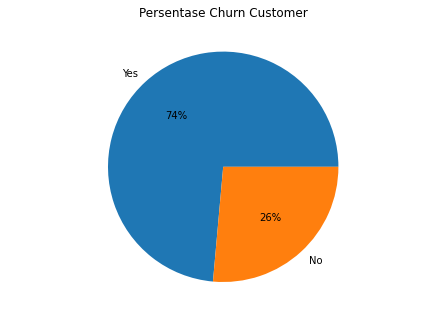

In [128]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Yes','No']
churn = df_load.Churn.value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%')
plt.title('Persentase Churn Customer')
plt.show()

Data tidak seimbang. Solusinya bisa resampling atau memilih metriks yang sesuai

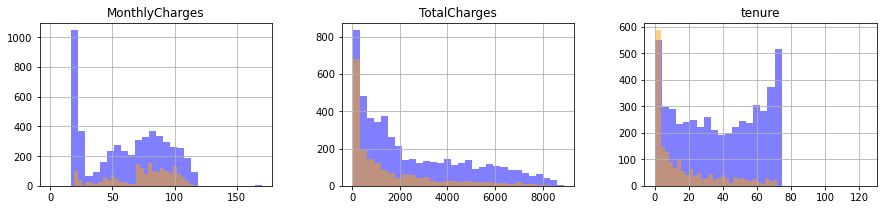

In [129]:
#creating bin in chart
numerical_features = ['MonthlyCharges','TotalCharges','tenure']
fig, ax = plt.subplots(1, 3, figsize=(15, 3))
# Use the following code to plot two overlays of histogram per each numerical_features, use a color of blue and orange, respectively
df_load[df_load.Churn == 'No'][numerical_features].hist(bins=30, color='blue', alpha=0.5, ax=ax)
df_load[df_load.Churn == 'Yes'][numerical_features].hist(bins=30, color='orange', alpha=0.5, ax=ax)
plt.show()

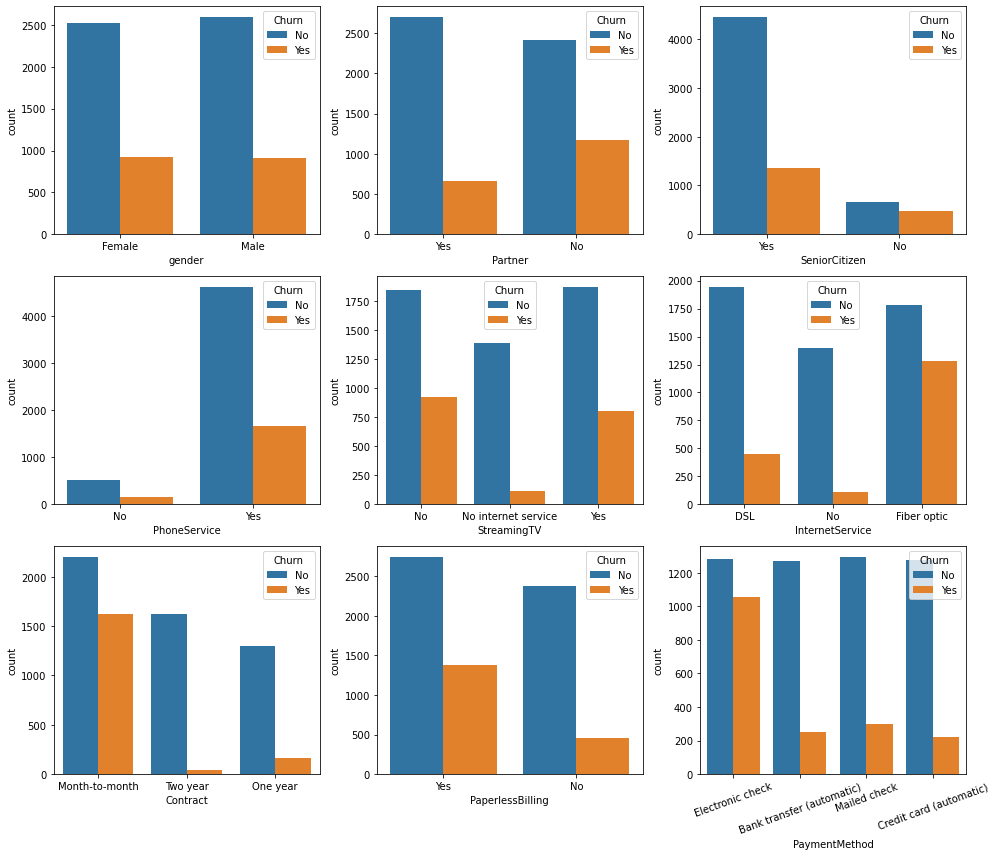

In [130]:
fig, ax = plt.subplots(3, 3, figsize=(14, 12))
sns.countplot(data=df_load, x='gender', hue='Churn', ax=ax[0][0])
sns.countplot(data=df_load, x='Partner', hue='Churn', ax=ax[0][1])
sns.countplot(data=df_load, x='SeniorCitizen', hue='Churn', ax=ax[0][2])
sns.countplot(data=df_load, x='PhoneService', hue='Churn', ax=ax[1][0])
sns.countplot(data=df_load, x='StreamingTV', hue='Churn', ax=ax[1][1])
sns.countplot(data=df_load, x='InternetService', hue='Churn', ax=ax[1][2])
sns.countplot(data=df_load, x='Contract', hue='Churn', ax=ax[2][0])
sns.countplot(data=df_load, x='PaperlessBilling', hue='Churn', ax=ax[2][1])
L = sns.countplot(data=df_load, x='PaymentMethod', hue='Churn', ax=ax[2][2])
L.xaxis.set_ticklabels(L.xaxis.get_ticklabels(), rotation=20)
plt.tight_layout()
plt.show()

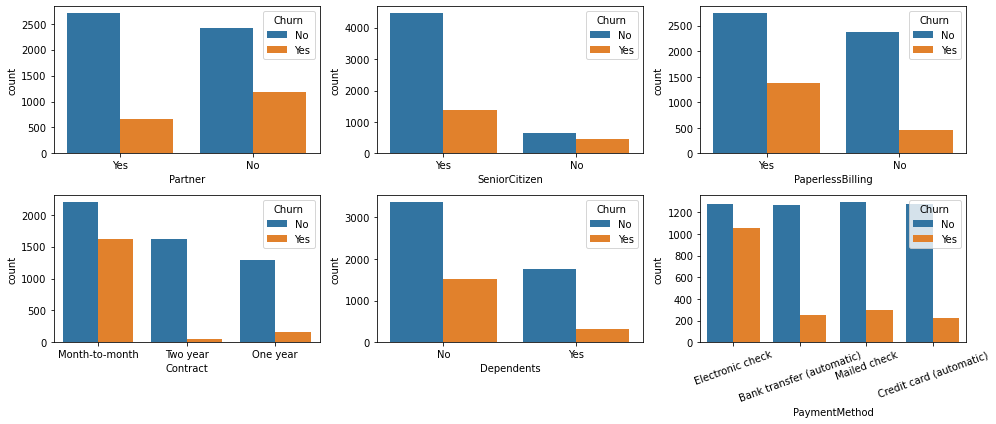

In [133]:
fig, ax = plt.subplots(2, 3, figsize=(14, 6))
sns.countplot(data=df_load, x='Partner', hue='Churn', ax=ax[0][0])
sns.countplot(data=df_load, x='SeniorCitizen', hue='Churn', ax=ax[0][1])
sns.countplot(data=df_load, x='PaperlessBilling', hue='Churn', ax=ax[0][2])
sns.countplot(data=df_load, x='Contract', hue='Churn', ax=ax[1][0])
sns.countplot(data=df_load, x='Dependents', hue='Churn', ax=ax[1][1])
L = sns.countplot(data=df_load, x='PaymentMethod', hue='Churn', ax=ax[1][2])
L.xaxis.set_ticklabels(L.xaxis.get_ticklabels(), rotation=20)
plt.tight_layout()
plt.show()

## Model the data

### Feature engineering

In [23]:
cleaned_df = df_load.drop(['customerID','UpdatedAt'], axis=1)
cleaned_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
4727,Male,No,Yes,No,60.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.50,1198.80,No
4738,Male,No,No,No,5.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,No,Mailed check,104.10,541.90,Yes
4737,Female,No,Yes,No,72.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),115.50,8312.75,No
4736,Female,No,Yes,Yes,56.0,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),81.25,4620.40,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,Male,No,No,No,1.0,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.75,44.75,No
2366,Female,Yes,No,No,1.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.15,70.15,Yes
2367,Female,No,No,No,1.0,Yes,No,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),85.55,85.55,Yes
2368,Female,No,Yes,No,72.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),117.15,8529.50,No


In [24]:
# Generate new feature "Number_AdditionalServices" by summing up the number of add-on services consumed.
cleaned_df['Number_AdditionalServices'] = (cleaned_df[['OnlineSecurity', 'DeviceProtection', 'StreamingMovies', 
                                                       'TechSupport', 'StreamingTV', 'OnlineBackup']] == 'Yes').sum(axis=1)
cleaned_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Number_AdditionalServices
0,Female,No,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
4727,Male,No,Yes,No,60.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.50,1198.80,No,0
4738,Male,No,No,No,5.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,No,Mailed check,104.10,541.90,Yes,4
4737,Female,No,Yes,No,72.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),115.50,8312.75,No,6
4736,Female,No,Yes,Yes,56.0,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),81.25,4620.40,No,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,Male,No,No,No,1.0,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.75,44.75,No,0
2366,Female,Yes,No,No,1.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.15,70.15,Yes,0
2367,Female,No,No,No,1.0,Yes,No,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),85.55,85.55,Yes,2
2368,Female,No,Yes,No,72.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),117.15,8529.50,No,6


<AxesSubplot:xlabel='Number_AdditionalServices', ylabel='count'>

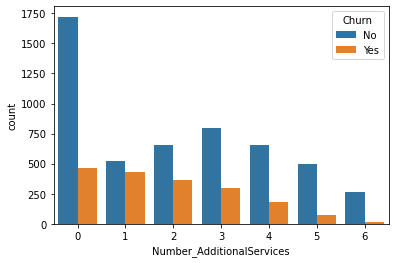

In [25]:
# Generate countplot for the new feature.
sns.countplot(data=cleaned_df, x='Number_AdditionalServices', hue='Churn')

In [26]:
# One-Hot-Encoding for identified columns.
features_ohe = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'Number_AdditionalServices']

cleaned_df = pd.get_dummies(cleaned_df, columns=features_ohe) 

In [27]:
#Convert all the non-numeric columns to numerical data types
for column in cleaned_df.columns:
    if cleaned_df[column].dtype == np.number: continue
    # Perform encoding for each non-numeric column
    cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])
cleaned_df.describe()

<ipython-input-27-f655843f7c79>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number: continue


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Number_AdditionalServices_0,Number_AdditionalServices_1,Number_AdditionalServices_2,Number_AdditionalServices_3,Number_AdditionalServices_4,Number_AdditionalServices_5,Number_AdditionalServices_6
count,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000
mean,0.504317,0.162302,0.483309,0.299281,32.423165,0.903741,0.591942,64.992201,2286.058750,0.264173,0.481439,0.096259,0.422302,0.343597,0.439856,0.216547,0.496978,0.216547,0.286475,0.438129,0.216547,0.345324,0.439424,0.216547,0.344029,0.493669,0.216547,0.289784,0.399137,0.216547,0.384317,0.395252,0.216547,0.388201,0.550072,0.209640,0.240288,0.218561,0.215827,0.336259,0.229353,0.314820,0.137266,0.147050,0.158273,0.121151,0.081295,0.040144
std,0.500017,0.368754,0.499757,0.457976,24.581073,0.294967,0.491509,30.032040,2265.702553,0.440923,0.499691,0.294967,0.493962,0.474943,0.496405,0.411921,0.500027,0.411921,0.452146,0.496193,0.411921,0.475508,0.496353,0.411921,0.475085,0.499996,0.411921,0.453695,0.489756,0.411921,0.486468,0.488940,0.411921,0.487376,0.497522,0.407081,0.427289,0.413300,0.411425,0.472463,0.420447,0.464478,0.344153,0.354182,0.365023,0.326326,0.273307,0.196311
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,36.462500,406.975000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.450000,1400.850000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3799.837500,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.

In [28]:
cleaned_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Number_AdditionalServices_0,Number_AdditionalServices_1,Number_AdditionalServices_2,Number_AdditionalServices_3,Number_AdditionalServices_4,Number_AdditionalServices_5,Number_AdditionalServices_6
0,0,0,1,0,1.0,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
4727,1,0,1,0,60.0,1,1,20.50,1198.80,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0
4738,1,0,0,0,5.0,1,0,104.10,541.90,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0
4737,0,0,1,0,72.0,1,1,115.50,8312.75,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1
4736,0,0,1,1,56.0,1,0,81.25,4620.40,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0


In [29]:
# Min-Max-Scaling for identified columns.
from sklearn.preprocessing import MinMaxScaler

features_mms = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_features_mms = pd.DataFrame(cleaned_df, columns=features_mms)
df_remaining_features = cleaned_df.drop(columns=features_mms)

mms = MinMaxScaler()
rescaled_features = mms.fit_transform(df_features_mms)

df_rescaled_features = pd.DataFrame(rescaled_features, columns=features_mms, index=df_remaining_features.index)

cleaned_df = pd.concat([df_remaining_features, df_rescaled_features], axis=1)
cleaned_df

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Number_AdditionalServices_0,Number_AdditionalServices_1,Number_AdditionalServices_2,Number_AdditionalServices_3,Number_AdditionalServices_4,Number_AdditionalServices_5,Number_AdditionalServices_6,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0.008065,0.175659,0.001223
4727,1,0,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0.483871,0.120637,0.133008
4738,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0.040323,0.612601,0.058951
4737,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0.580645,0.679687,0.935020
4736,0,0,1,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0.451613,0.478135,0.518752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,1,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0.008065,0.263342,0.002903
2366,0,1,0,0,1,1,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0.008065,0.412814,0.005767
2367,0,0,0,0,1,1,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0.008065,0.503439,0.007503
2368,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0.580645,0.689396,0.959456


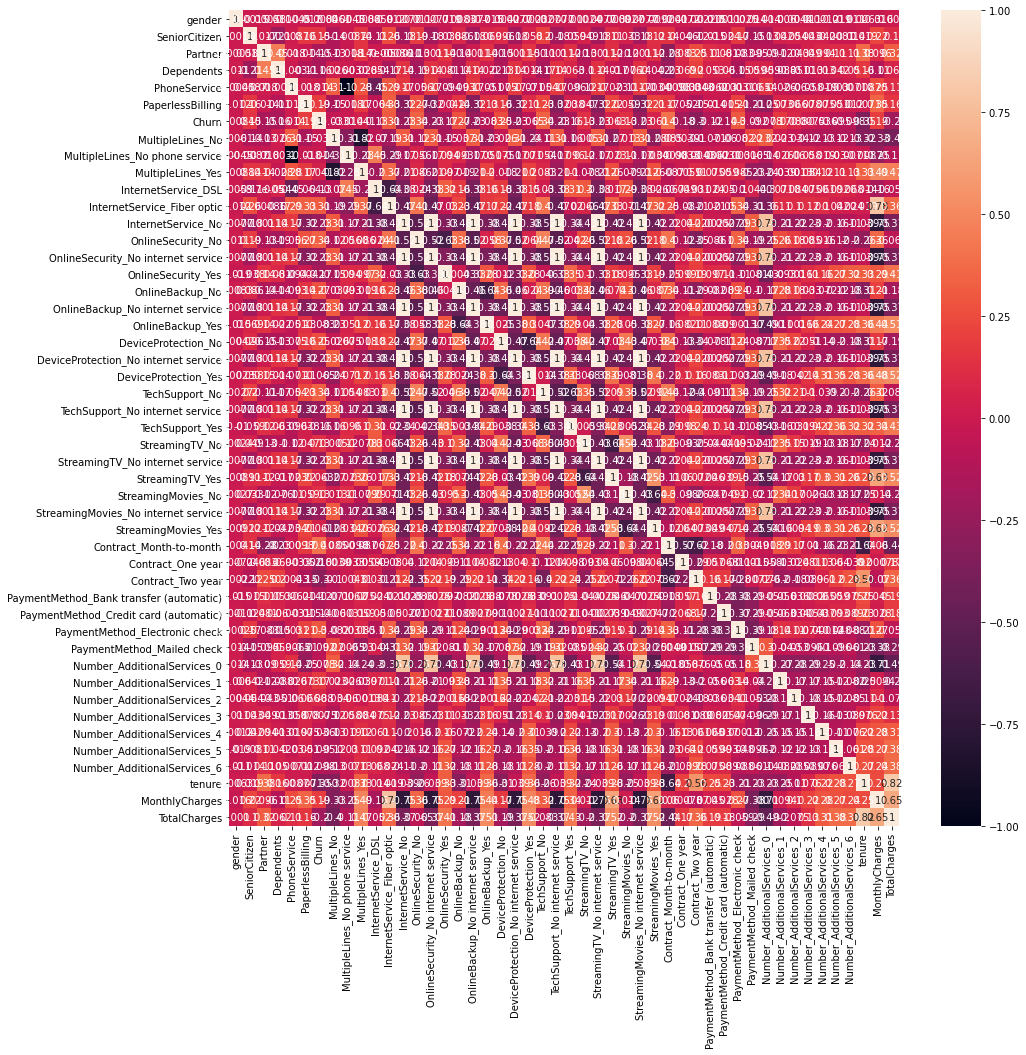

In [30]:
plt.figure(figsize=(15,15))
sns.heatmap(cleaned_df.corr(), annot=True)
plt.show()

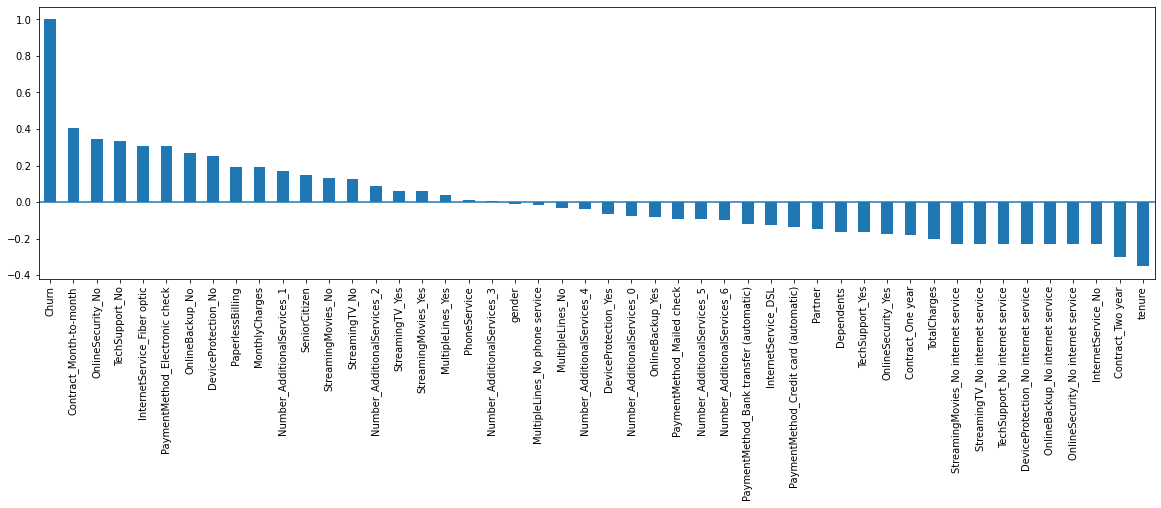

In [31]:
# Show correlation plot for correlation of Churn with each of the remaining features.
plt.figure(figsize=(16,10))
cleaned_df.corr()['Churn'].sort_values(ascending=False).plot(kind='bar', figsize=(20,5))
plt.axhline(y=0)
#plt.xticks(rotation=35)
plt.show()

In [32]:
# Predictor dan target
X = cleaned_df.drop('Churn', axis=1)
y = cleaned_df['Churn']
# Splitting train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
# Print according to the expected result
print('Jumlah baris dan kolom dari x_train adalah:', x_train.shape, ', sedangkan Jumlah baris dan kolom dari y_train adalah:', y_train.shape)
print('Prosentase Churn di data Training adalah:')
y_train.value_counts(normalize=True)

Jumlah baris dan kolom dari x_train adalah: (4865, 47) , sedangkan Jumlah baris dan kolom dari y_train adalah: (4865,)
Prosentase Churn di data Training adalah:


0    0.734841
1    0.265159
Name: Churn, dtype: float64

In [34]:
print('Jumlah baris dan kolom dari x_test adalah:', x_test.shape, ', sedangkan Jumlah baris dan kolom dari y_test adalah:', y_test.shape)
print('Prosentase Churn di data Testing adalah:')
y_test.value_counts(normalize=True)

Jumlah baris dan kolom dari x_test adalah: (2085, 47) , sedangkan Jumlah baris dan kolom dari y_test adalah: (2085,)
Prosentase Churn di data Testing adalah:


0    0.738129
1    0.261871
Name: Churn, dtype: float64

### Logistic Regression

In [35]:
log_model = LogisticRegression().fit(x_train, y_train)
#print('Model Logistic Regression yang terbentuk adalah: \n', log_model)

In [36]:
# Predict
y_train_pred = log_model.predict(x_train)
# Print classification report 
print('Classification Report Training Model (Logistic Regression) :')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      3575
           1       0.67      0.56      0.61      1290

    accuracy                           0.81      4865
   macro avg       0.76      0.73      0.74      4865
weighted avg       0.80      0.81      0.81      4865



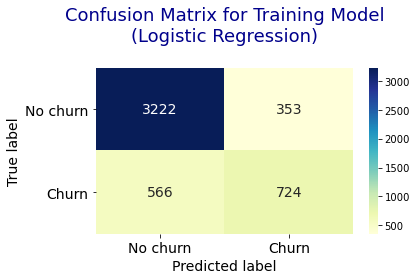

In [37]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train,y_train_pred)), ('No churn','Churn'), ('No churn','Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [38]:
# Predict
y_test_pred = log_model.predict(x_test)
# Print classification report 
print('Classification Report Testing Model (Logistic Regression) :')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1539
           1       0.64      0.51      0.57       546

    accuracy                           0.80      2085
   macro avg       0.74      0.70      0.72      2085
weighted avg       0.79      0.80      0.79      2085



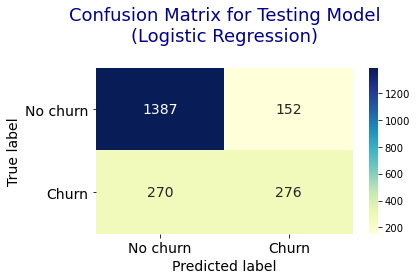

In [39]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn','Churn'), ('No churn','Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [40]:
from sklearn.metrics import accuracy_score

print(f'Accuracy Score Test: {accuracy_score(y_test, y_test_pred)}')
print(f'Accuracy Score Train: {log_model.score(x_train, y_train)} (as comparison)')

Accuracy Score Test: 0.7976019184652278
Accuracy Score Train: 0.8110996916752312 (as comparison)


### Random Forest Classifier

In [41]:
rdf_model = RandomForestClassifier().fit(x_train, y_train)
#print('Model Random Forest Classifier yang terbentuk adalah: \n', rdf_model)

In [42]:
# Predict
y_train_pred = rdf_model.predict(x_train)
# Print classification report 
print('Classification Report Training Model (Random Forest Classifier) :')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Random Forest Classifier) :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3575
           1       1.00      0.99      1.00      1290

    accuracy                           1.00      4865
   macro avg       1.00      1.00      1.00      4865
weighted avg       1.00      1.00      1.00      4865



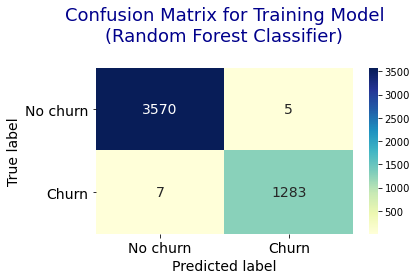

In [43]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train,y_train_pred)), ('No churn','Churn'), ('No churn','Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest Classifier)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [44]:
# Predict
y_test_pred = rdf_model.predict(x_test)
# Print classification report 
print('Classification Report Testing Model (Random Forest Classifier) :')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Random Forest Classifier) :
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.65      0.49      0.55       546

    accuracy                           0.80      2085
   macro avg       0.74      0.70      0.71      2085
weighted avg       0.78      0.80      0.79      2085



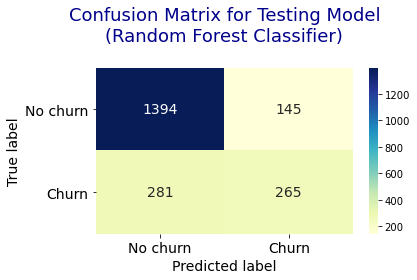

In [45]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn','Churn'), ('No churn','Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest Classifier)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [46]:
from sklearn.metrics import accuracy_score

print(f'Accuracy Score Test: {accuracy_score(y_test, y_test_pred)}')
print(f'Accuracy Score Train: {rdf_model.score(x_train, y_train)} (as comparison)')

Accuracy Score Test: 0.7956834532374101
Accuracy Score Train: 0.9975334018499487 (as comparison)


### Gradient Boosting Classifier

In [47]:
gbt_model = GradientBoostingClassifier().fit(x_train, y_train)

In [48]:
# Predict
y_train_pred = gbt_model.predict(x_train)
# Print classification report 
print('Classification Report Training Model (Gradient Boosting Classifier) :')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Gradient Boosting Classifier) :
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      3575
           1       0.73      0.59      0.65      1290

    accuracy                           0.83      4865
   macro avg       0.80      0.76      0.77      4865
weighted avg       0.83      0.83      0.83      4865



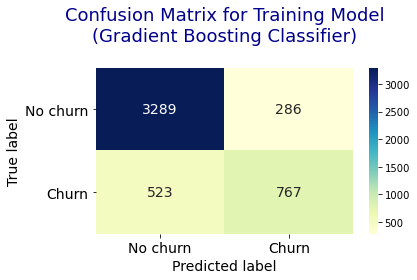

In [49]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train,y_train_pred)), ('No churn','Churn'), ('No churn','Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Gradient Boosting Classifier)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [50]:
# Predict
y_test_pred = gbt_model.predict(x_test)
# Print classification report 
print('Classification Report Testing Model (Gradient Boosting Classifier) :')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Gradient Boosting Classifier) :
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1539
           1       0.68      0.51      0.58       546

    accuracy                           0.81      2085
   macro avg       0.76      0.71      0.73      2085
weighted avg       0.80      0.81      0.80      2085



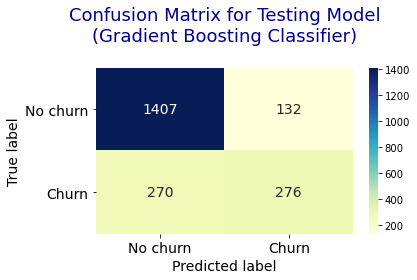

In [51]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn','Churn'), ('No churn','Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Gradient Boosting Classifier)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [52]:
from sklearn.metrics import accuracy_score

print(f'Accuracy Score Test: {accuracy_score(y_test, y_test_pred)}')
print(f'Accuracy Score Train: {gbt_model.score(x_train, y_train)} (as comparison)')

Accuracy Score Test: 0.8071942446043165
Accuracy Score Train: 0.833710174717369 (as comparison)


In [143]:
# Define a function that plots the feature weights for a classifier.
def feature_weights(X_df, classifier, classifier_name):
    weights = pd.Series(classifier.coef_[0], index=X_df.columns.values).sort_values(ascending=False)
    
    top_weights_selected = weights[:10]
    plt.figure(figsize=(7,4))
    plt.tick_params(labelsize=10)#plt.xlabel(fontsize=10)
    plt.title(f'{classifier_name} - Top 10 Features')
    top_weights_selected.plot(kind="bar")
    
    bottom_weights_selected = weights[-10:]
    plt.figure(figsize=(7,4))
    plt.tick_params(labelsize=10)#plt.xlabel(fontsize=10)
    plt.title(f'{classifier_name} - Bottom 10 Features')
    bottom_weights_selected.plot(kind="bar")
    
    return print("")

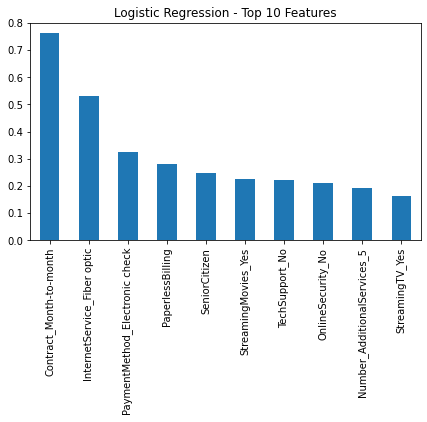

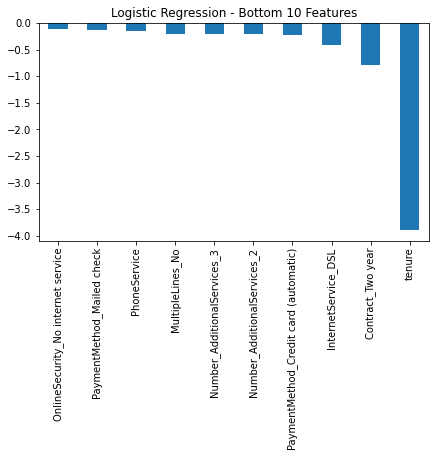

In [144]:
feature_weights(x_train, log_model, 'Logistic Regression')

In [142]:
feature_weights(x_train, gbt_model, 'Logistic Regression')

AttributeError: 'GradientBoostingClassifier' object has no attribute 'coef_'

## Hyperparameter Tuning

### Logistic regression

In [53]:
from sklearn.model_selection import GridSearchCV

#Define parameter grid for GridSearch and instanciate and train model.
param_grid_L1 = {'penalty': ['l1', 'l2'], 'C': np.arange(.1, 5, .1)}
logreg_tuned = LogisticRegression(solver='saga', max_iter=1000)   
logreg_tuned_gs = GridSearchCV(logreg_tuned, param_grid_L1, cv=5)
logreg_tuned_gs.fit(x_train, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_logreg_tuned = logreg_tuned_gs.predict(x_test)
y_pred_logreg_tuned_prob = logreg_tuned_gs.predict_proba(x_test)

print('Logistic Regression - Best Parameters: ', logreg_tuned_gs.best_params_)

Logistic Regression - Best Parameters:  {'C': 1.2000000000000002, 'penalty': 'l1'}


In [54]:
# Print classification report 
print('Classification Report Testing Model (Logistic Regression) :')
print(classification_report(y_test, y_pred_logreg_tuned))

Classification Report Testing Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1539
           1       0.65      0.51      0.57       546

    accuracy                           0.80      2085
   macro avg       0.75      0.71      0.72      2085
weighted avg       0.79      0.80      0.79      2085



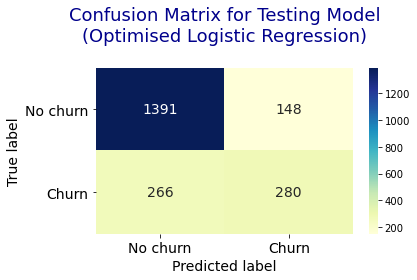

In [55]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_pred_logreg_tuned)), ('No churn','Churn'), ('No churn','Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Optimised Logistic Regression)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [56]:
from sklearn.metrics import accuracy_score

print(f'Accuracy Score Test: {accuracy_score(y_test, y_pred_logreg_tuned)}')
print(f'Accuracy Score Train: {logreg_tuned_gs.score(x_train, y_train)} (as comparison)')

Accuracy Score Test: 0.8014388489208633
Accuracy Score Train: 0.8100719424460432 (as comparison)


### Random Forest Classifier

In [57]:
from sklearn.model_selection import RandomizedSearchCV

#Define parameter grid for RandomizedSearch and instanciate and train model.
param_grid_rf = {'n_estimators': np.arange(10, 2000, 10), 
                 'max_features': ['auto', 'sqrt'],
                 'max_depth': np.arange(10, 200, 10),
                 'criterion': ['gini', 'entropy'],
                 'bootstrap': [True, False]}

rf = RandomForestClassifier()
rf_random_grid = RandomizedSearchCV(estimator=rf, param_distributions=param_grid_rf, cv=5, verbose=0)
rf_random_grid.fit(x_train, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_rf_tuned = rf_random_grid.predict(x_test)
y_pred_rf_tuned_prob = rf_random_grid.predict_proba(x_test)

print('Random Forest - Best Parameters: ', rf_random_grid.best_params_)

Random Forest - Best Parameters:  {'n_estimators': 1950, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'entropy', 'bootstrap': True}


In [58]:
# Print classification report 
print('Classification Report Testing Model (Optimised Random Forest Classifier) :')
print(classification_report(y_test, y_pred_rf_tuned))

Classification Report Testing Model (Optimised Random Forest Classifier) :
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1539
           1       0.66      0.49      0.57       546

    accuracy                           0.80      2085
   macro avg       0.75      0.70      0.72      2085
weighted avg       0.79      0.80      0.79      2085



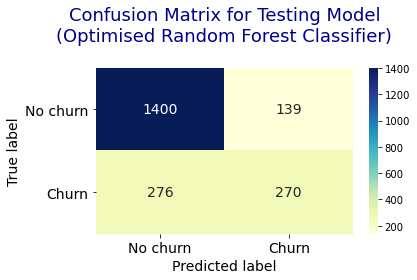

In [59]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_pred_rf_tuned)), ('No churn','Churn'), ('No churn','Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Optimised Random Forest Classifier)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [60]:
from sklearn.metrics import accuracy_score

print(f'Accuracy Score Test: {accuracy_score(y_test, y_pred_rf_tuned)}')
print(f'Accuracy Score Train: {rf_random_grid.score(x_train, y_train)} (as comparison)')

Accuracy Score Test: 0.8009592326139089
Accuracy Score Train: 0.8698869475847893 (as comparison)


### Gradient Boosting Classifier

In [61]:
from sklearn.model_selection import GridSearchCV

#Define parameter grid for GridSearch and instanciate and train model.
param_grid_gbt = {"n_estimators":[5,50,250,500],
                 "max_depth":[1,3,5,7,9],
                 "learning_rate":[0.01,0.1,1,10,100]}

gbt_tuned = GradientBoostingClassifier()   
gbt_tuned_gs = GridSearchCV(gbt_tuned, param_grid_gbt, cv=5)
gbt_tuned_gs.fit(x_train, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_gbt_tuned = gbt_tuned_gs.predict(x_test)
y_pred_gbt_tuned_prob = gbt_tuned_gs.predict_proba(x_test)

print('Logistic Regression - Best Parameters: ', gbt_tuned_gs.best_params_)

Logistic Regression - Best Parameters:  {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 500}


In [62]:
# Print classification report 
print('Classification Report Testing Model (Optimised Gradient Boosting Classifier) :')
print(classification_report(y_test, y_pred_gbt_tuned))

Classification Report Testing Model (Optimised Gradient Boosting Classifier) :
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1539
           1       0.67      0.51      0.58       546

    accuracy                           0.80      2085
   macro avg       0.75      0.71      0.73      2085
weighted avg       0.79      0.80      0.80      2085



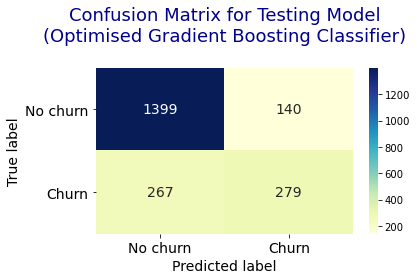

In [63]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_pred_gbt_tuned)), ('No churn','Churn'), ('No churn','Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Optimised Gradient Boosting Classifier)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [64]:
from sklearn.metrics import accuracy_score

print(f'Accuracy Score Test: {accuracy_score(y_test, y_pred_rf_tuned)}')
print(f'Accuracy Score Train: {rf_random_grid.score(x_train, y_train)} (as comparison)')

Accuracy Score Test: 0.8009592326139089
Accuracy Score Train: 0.8698869475847893 (as comparison)


## Menentukan Algoritma Model Terbaik

performa dari model Logistic Regression cenderung mampu memprediksi sama baiknya di fase training maupun testing (akurasi training 80%, akurasi testing 79%), dilain sisi algoritma lainnya cenderung Over-Fitting performanya.

In [65]:
#Save Model log_model (Logistic Regression) sebagai model terbaik
pickle.dump(log_model, open('best_model_churn.pkl', 'wb'))

## Data Balancing using SMOTE

In [69]:
# import library
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 3575, 1: 1290})
Resample dataset shape Counter({0: 3575, 1: 3575})


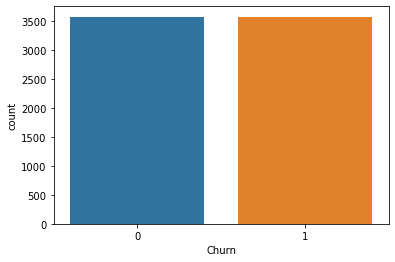

In [71]:
sns.countplot(x=y_smote);

In [81]:
rdf_smote_model = LogisticRegression(max_iter=200).fit(x_smote, y_smote)
#print('Model Random Forest Classifier yang terbentuk adalah: \n', rdf_model)

In [82]:
# Predict
y_smote_pred = rdf_smote_model.predict(x_smote)
# Print classification report 
print('Classification Report Training Model - SMOTE (Random Forest Classifier) :')
print(classification_report(y_smote, y_smote_pred))

Classification Report Training Model - SMOTE (Random Forest Classifier) :
              precision    recall  f1-score   support

           0       0.84      0.81      0.83      3575
           1       0.82      0.85      0.83      3575

    accuracy                           0.83      7150
   macro avg       0.83      0.83      0.83      7150
weighted avg       0.83      0.83      0.83      7150



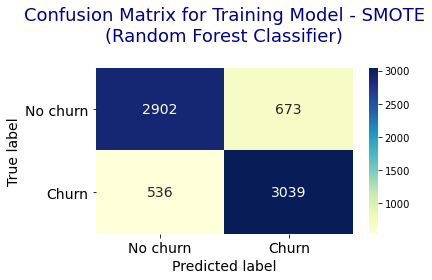

In [83]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_smote,y_smote_pred)), ('No churn','Churn'), ('No churn','Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=14)

plt.title('Confusion Matrix for Training Model - SMOTE\n(Random Forest Classifier)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [84]:
# Predict
y_test_pred = rdf_smote_model.predict(x_test)
# Print classification report 
print('Classification Report Testing Model - SMOTE (Random Forest Classifier) :')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model - SMOTE (Random Forest Classifier) :
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1539
           1       0.56      0.64      0.60       546

    accuracy                           0.78      2085
   macro avg       0.72      0.73      0.72      2085
weighted avg       0.79      0.78      0.78      2085



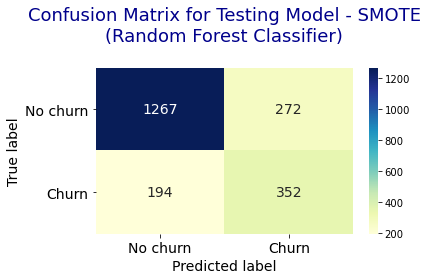

In [85]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn','Churn'), ('No churn','Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=14)

plt.title('Confusion Matrix for Testing Model - SMOTE\n(Random Forest Classifier)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [86]:
from sklearn.metrics import accuracy_score

print(f'Accuracy Score Test: {accuracy_score(y_test, y_test_pred)}')
print(f'Accuracy Score Train: {rdf_model.score(x_smote, y_smote)} (as comparison)')

Accuracy Score Test: 0.7764988009592326
Accuracy Score Train: 0.9158041958041958 (as comparison)


In [146]:
list(reversed(range(1,11)))

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]